# Processamento de arquivos texto para SWAT
Fornece um framework para processamento de dados em arquivos texto para geração de dados utilizados na calibração e validação com SWATCUP.
Este notebook mostra um passo a passo para abrir o arquivo de texto com Pandas, processar a data, o dado da variavel e gerar o arquivo de saída com os valores formatados para swatcup.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import os

In [2]:
# Nome do arquivo de entrada e da coluna com a variavel
INPUT_FILE_NAME = './sb5_vazoes_C_46830000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb8_vazoes_C_46790000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb11_vazoes_C_46780000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb13_vazoes_C_46870000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb14_vazoes_C_46902000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb17_vazoes_C_46675000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb18_vazoes_C_46650000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb21_vazoes_C_46590000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb22_vazoes_C_46570000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb23_vazoes_C_46610000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb24_vazoes_C_46550000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb25_vazoes_C_46520000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb27_vazoes_C_46530000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb29_vazoes_C_46490000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb34_vazoes_C_46415000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb36_vazoes_C_46420000.csv'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb37_vazoes_C_46400000.csv'    # Nome do arquivo de entrada



#INPUT_FILE_NAME = './sb8_vazoes_C_46790000.csv'    # Nome do arquivo de entrada
#INPUT_FILE_NAME = './sb23_vazoes_C_46610000.csv'    # Nome do arquivo de entrada
#INPUT_FILE_NAME = './sb14_vazoes_C_46902000.csv'    # Nome do arquivo de entrada

DATE_COL = 'Data'
VARIABLE_COL = 'Media'    # Nome da coluna com os dados
CONSISTENCY_COL = 'NivelConsistencia'
CONSISTENCY_LEVEL = None # Seleciona nivel de consistencia. Se deixar em None ele pega os maiores valores de consistencia

# Configuracao de formatacao do arquivo de entrada
DELIMITER = ';'    # delimitator entre campos 
SKIP_ROWS = 13    # pula esse numero de linha antes de comercar a ler
ENCODING = 'iso-8859-1'    # Codificacao do arquivo. No Brasil o mais comum e iso-8859-1. Outro formato comum eh utf-8
DECIMAL = ','    # Caracter utilizado como decimal

# Gera nome do arquivo de saida a partir do de entrada. Geralmente não precisa ser alterado
path, filename = os.path.split(INPUT_FILE_NAME)
newfilename = 'swat_cal_val_{}'.format(filename)
OUTPUT_FILE_NAME = os.path.join(path, newfilename)    # Nome do arquivo de saida com dados processados para uso no SWAT
ID = filename    # Codigo identificador da estacao, para ser utilizano no comentario do dado. Serve para confirmar a origem do dado

# Periodo utilizado para calibracao (ano, mes, dia)
CALIBRATION_START_DATE = datetime.date(2003, 1, 1)
CALIBRATION_END_DATE = datetime.date(2016,12,31)
CALIBRATION_DESC = 'cal_({})'.format(ID)    # Descricao dos dados de calibracao

# Periodo utilizado para validacao
VALIDATION_START_DATE = datetime.date(2011, 1, 1)
VALIDATION_END_DATE =datetime.date(2016,12,1)
VALIDATION_DESC = 'val_({})'.format(ID)    # Descricao dos dados de calibracao


# Passo do modelo
# TODO: ainda nao esta implementado, por enquanto nao é utilizado
STEP = 'month'

## Le arquivo de entrada e transforma para formato interno

In [3]:
# Abre arquivo com pandas
df = pd.read_csv(INPUT_FILE_NAME, delimiter=DELIMITER, encoding=ENCODING, skiprows=SKIP_ROWS, index_col=False, decimal=DECIMAL)
df

,EstacaoCodigo,NivelConsistencia,Data,Hora,MediaDiaria,MetodoObtencaoVazoes,Maxima,Minima,Media,DiaMaxima,...,Vazao22Status,Vazao23Status,Vazao24Status,Vazao25Status,Vazao26Status,Vazao27Status,Vazao28Status,Vazao29Status,Vazao30Status,Vazao31Status
0,46400000,1,01/12/2018,NaN,1,1,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46400000,1,01/11/2018,NaN,1,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,46400000,1,01/07/2018,NaN,1,1,7.139,6.874,6.968,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,46400000,1,01/06/2018,NaN,1,1,7.139,6.874,7.069,9.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,46400000,1,01/05/2018,NaN,1,1,7.976,6.874,7.274,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,46400000,2,01/01/2003,NaN,1,1,21.269,13.438,17.496,8.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
189,46400000,2,01/12/2002,NaN,1,1,18.968,7.102,11.328,31.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
190,46400000,2,01/11/2002,NaN,1,1,13.870,7.490,9.830,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
191,46400000,2,01/10/2002,NaN,1,1,11.412,7.230,7.634,30.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
# Converte coluna de data de texto para formato interno
date = pd.to_datetime(df[DATE_COL], format='%d/%m/%Y')

In [5]:
temp_variable = df[[CONSISTENCY_COL] + [VARIABLE_COL]]
temp_variable.index = date
# Ordena pela data e pelo nivel de consistencia
temp_variable = temp_variable.sort_values(by = [DATE_COL, CONSISTENCY_COL], ascending = [True, True])
temp_variable

,NivelConsistencia,Media
Data,,
2002-09-01,2,NaN
2002-10-01,2,7.634
2002-11-01,2,9.830
2002-12-01,2,11.328
2003-01-01,2,17.496
...,...,...
2018-05-01,1,7.274
2018-06-01,1,7.069
2018-07-01,1,6.968


In [6]:
# Aplica o nivel de consistencia
if CONSISTENCY_LEVEL:
    temp_variable = temp_variable[temp_variable[CONSISTENCY_COL] == CONSISTENCY_LEVEL]
    print('Valor de consistencia selecionado: {}'.format(CONSISTENCY_LEVEL))
else:
    # Nao foi seleciana consistencia. Utiliza maior valor de consistencia disponivel para uma dada data
    temp_variable = temp_variable[~temp_variable.index.duplicated(keep='last')]
    print('Valor de consistencia nao selecionado. Utilizando o maior disponivel para odado')
temp_variable

Valor de consistencia nao selecionado. Utilizando o maior disponivel para odado


,NivelConsistencia,Media
Data,,
2002-09-01,2,NaN
2002-10-01,2,7.634
2002-11-01,2,9.830
2002-12-01,2,11.328
2003-01-01,2,17.496
...,...,...
2018-05-01,1,7.274
2018-06-01,1,7.069
2018-07-01,1,6.968


In [7]:
# Faz a media de vazao dos dias (ignora Nan)
variable = temp_variable[VARIABLE_COL]
variable

Data
2002-09-01       NaN
2002-10-01     7.634
2002-11-01     9.830
2002-12-01    11.328
2003-01-01    17.496
               ...  
2018-05-01     7.274
2018-06-01     7.069
2018-07-01     6.968
2018-11-01       NaN
2018-12-01       NaN
Name: Media, Length: 193, dtype: float64

## Visualização dos dados parar verificação

Text(0.5, 1.0, 'Media')

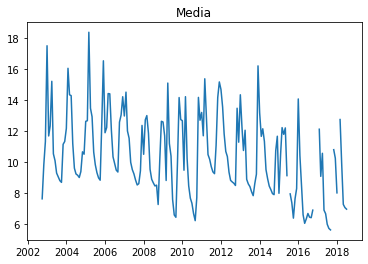

In [8]:
# Mostra gráfico para verificar se parece tudo ok
plt.plot(variable)
plt.title(VARIABLE_COL)

## Gera arquivo para SWAT

In [9]:
# Seleciona faixa de datas
calibration = variable[CALIBRATION_START_DATE: CALIBRATION_END_DATE]
validation = variable[VALIDATION_START_DATE: VALIDATION_END_DATE]

In [10]:
# Calcula steps e gera arquivo saida de calibração
step_temp = []
serie_temp = []
index_temp = []
description_temp = []
no_data_count = 0
for index, val in calibration.iteritems():
    # Se for Nan pula
    if np.isnan(val):
        no_data_count += 1
        continue
        
    year = index.year
    month = index.month
    day = index.day
    step = (year - CALIBRATION_START_DATE.year)*12 + (month - CALIBRATION_START_DATE.month) + 1
    step_temp.append(step)
    serie_temp.append(val)
    description = CALIBRATION_DESC + '_({}-{}-{})'.format(year,month,day)
    description_temp.append(description)
    #row['model_step'] = step
    #calibration.loc[index, 'step'] = step
    #calibration.loc[index, 'description'] = 
    
calibration_out = pd.DataFrame({'step': step_temp, 'decription': description_temp, 'value': serie_temp})
calibration_out.set_index('step', inplace=True)
print('Calibracao')
calibration_out

Calibracao


,decription,value
step,,
1,cal_(sb37_vazoes_C_46400000.csv)_(2003-1-1),17.496
2,cal_(sb37_vazoes_C_46400000.csv)_(2003-2-1),11.684
3,cal_(sb37_vazoes_C_46400000.csv)_(2003-3-1),12.323
4,cal_(sb37_vazoes_C_46400000.csv)_(2003-4-1),15.205
5,cal_(sb37_vazoes_C_46400000.csv)_(2003-5-1),10.533
...,...,...
162,cal_(sb37_vazoes_C_46400000.csv)_(2016-6-1),6.347
163,cal_(sb37_vazoes_C_46400000.csv)_(2016-7-1),6.689
164,cal_(sb37_vazoes_C_46400000.csv)_(2016-8-1),6.449


In [11]:
# Calcula steps e gera arquivo saida de calibração
step_temp = []
serie_temp = []
index_temp = []
description_temp = []
no_data_count = 0
for index, val in validation.iteritems():
    # Se for Nan pula
    if np.isnan(val):
        no_data_count += 1
        continue
        
    year = index.year
    month = index.month
    day = index.day
    step = (year - VALIDATION_START_DATE.year)*12 + (month - VALIDATION_START_DATE.month) + 1
    step_temp.append(step)
    serie_temp.append(val)
    description = VALIDATION_DESC + '_({}-{}-{})'.format(year,month,day)
    description_temp.append(description)
    #row['model_step'] = step
    #calibration.loc[index, 'step'] = step
    #calibration.loc[index, 'description'] = 
    
validation_out = pd.DataFrame({'step': step_temp, 'decription': description_temp, 'value': serie_temp})
validation_out.set_index('step', inplace=True)
print('Validacao')
validation_out

Validacao


,decription,value
step,,
1,val_(sb37_vazoes_C_46400000.csv)_(2011-1-1),13.198
2,val_(sb37_vazoes_C_46400000.csv)_(2011-2-1),11.695
3,val_(sb37_vazoes_C_46400000.csv)_(2011-3-1),15.368
4,val_(sb37_vazoes_C_46400000.csv)_(2011-4-1),12.818
5,val_(sb37_vazoes_C_46400000.csv)_(2011-5-1),10.486
...,...,...
66,val_(sb37_vazoes_C_46400000.csv)_(2016-6-1),6.347
67,val_(sb37_vazoes_C_46400000.csv)_(2016-7-1),6.689
68,val_(sb37_vazoes_C_46400000.csv)_(2016-8-1),6.449


In [12]:
# Gera arquivo com valores para calibracao e validacao
with open(OUTPUT_FILE_NAME, 'w') as fo:
    fo.write('Dados de calibracao/validacao para SWAT\n')
    fo.write('Arquivo de entrada: {}\n'.format(INPUT_FILE_NAME))
    fo.write('Arquivo de saida: {}\n'.format(OUTPUT_FILE_NAME))
    fo.write('Variavel: {}\n'.format(VARIABLE_COL))
    fo.write('Passo: {}\n'.format(STEP))
    
    fo.write('\n\n')

    fo.write('Calibracao\n')
    fo.write('Data inicial: {}\n'.format(CALIBRATION_START_DATE))
    fo.write('Data final: {}\n'.format(CALIBRATION_END_DATE))
    fo.write('Numero elementos: {}\n'.format(len(calibration_out.index)))
    calibration_out.to_csv(fo, sep=' ', line_terminator='\n')

    fo.write('\n\n')
    
    fo.write('Validacao\n')
    fo.write('Data inicial: {}\n'.format(VALIDATION_START_DATE))
    fo.write('Data final: {}\n'.format(VALIDATION_END_DATE))
    fo.write('Numero elementos: {}\n'.format(len(validation_out.index)))
    validation_out.to_csv(fo, sep=' ', line_terminator='\n')
print('Arquivo de saida: {}'.format(OUTPUT_FILE_NAME))

Arquivo de saida: .\swat_cal_val_sb37_vazoes_C_46400000.csv
